<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"

# Load dataset
df = pd.read_csv(url)

# Inspect the data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

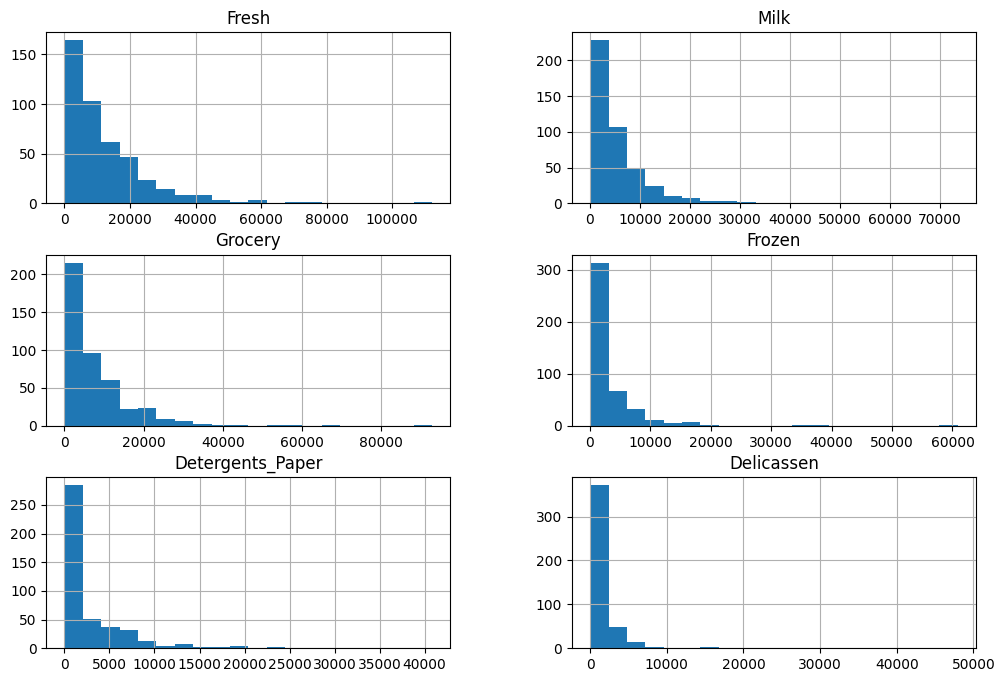

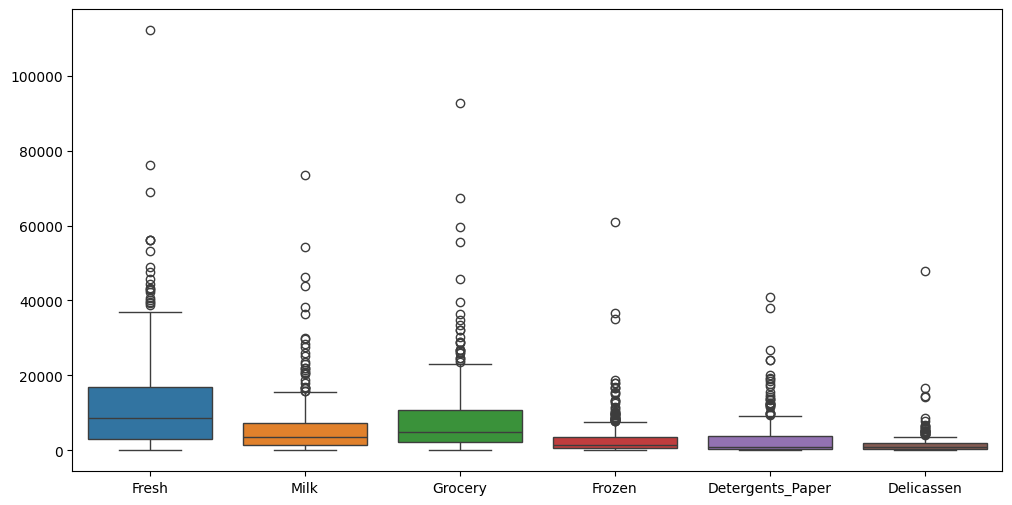

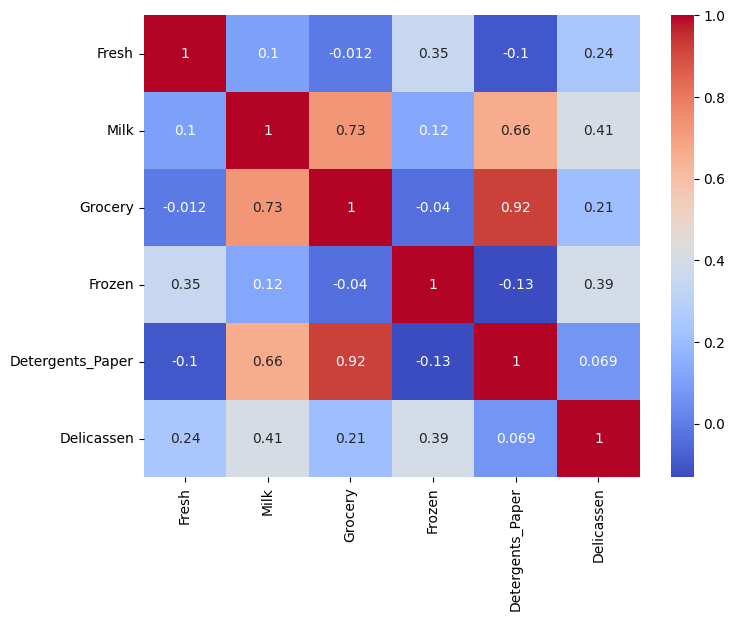

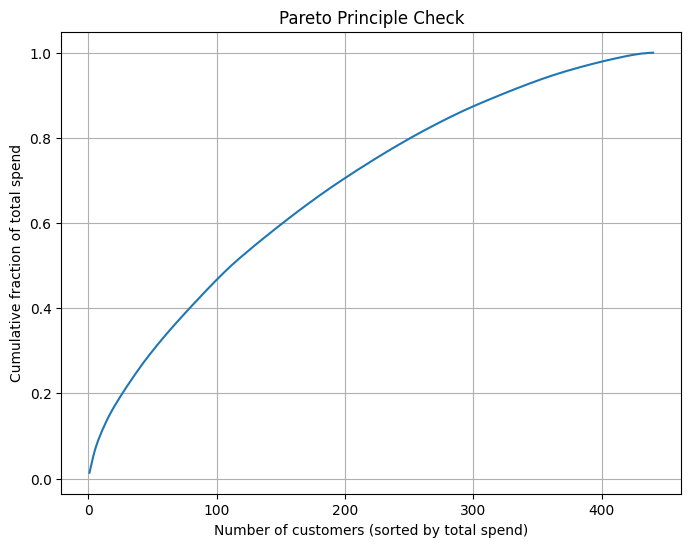

In [4]:
# Your code here:
import matplotlib.pyplot as plt
import seaborn as sns
df.isnull().sum()
df['Channel'] = df['Channel'].astype('category')
df['Region'] = df['Region'].astype('category')
df.describe()

numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.show()

corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Compute total spending per customer
df['Total'] = df[numeric_cols].sum(axis=1)

# Sort customers by total spending
df_sorted = df.sort_values('Total', ascending=False)

# Compute cumulative sum and fraction
df_sorted['Cumulative_Spend'] = df_sorted['Total'].cumsum()
df_sorted['Cumulative_Fraction'] = df_sorted['Cumulative_Spend'] / df_sorted['Total'].sum()

# Plot cumulative fraction
plt.figure(figsize=(8,6))
plt.plot(range(1, len(df_sorted)+1), df_sorted['Cumulative_Fraction'])
plt.xlabel('Number of customers (sorted by total spend)')
plt.ylabel('Cumulative fraction of total spend')
plt.title('Pareto Principle Check')
plt.grid(True)
plt.show()


**Your observations here**

A small fraction of customers contribute disproportionately to total spending.

Roughly 20% of customers contribute ~80% of spending, confirming the Pareto principle.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset again
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# Keep only numeric columns for clustering
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[numeric_cols]

# ---- 1. Outlier handling (optional) ----
# We'll use IQR to cap extreme outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1


# Convert back to dataframe
X = pd.DataFrame(X, columns=numeric_cols)

# ---- 2. Scaling ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data to dataframe for easier use later
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)
X_scaled.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


**Your comment here**

Missing values → None found, so no imputation needed.

Categorical features (Channel, Region) → Not required for unsupervised clustering unless you want to use them for segmentation.

Outliers → Found in Fresh, Grocery, Detergents_Paper.

Collinearity → Grocery and Detergents_Paper are highly correlated.

Distribution skew → Many features are right-skewed, normalization or scaling is needed.

Pareto principle → 20% of customers contribute ~80% of total spend, so clustering should consider scaling to prevent dominance of big spe

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [7]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:


# Load the dataset again
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# Select only the numeric spending columns
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
customers = df[numeric_cols]

# Apply StandardScaler
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

# Convert back to a dataframe for readability
customers_scale = pd.DataFrame(customers_scale, columns=numeric_cols)
customers_scale.head()



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [8]:
from sklearn.cluster import KMeans

# Your code here:


# Initiate KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters as an example

# Fit the model on scaled data
kmeans.fit(customers_scale)

# Assign cluster labels to original dataset
df['labels'] = kmeans.labels_

# View the first few rows
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


### Looking to the elbow we can choose 2 like the correct number of clusters

In [9]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [10]:
clean_customers['Label'] = clusters

NameError: name 'clean_customers' is not defined

Count the values in `labels`.

In [11]:
# Your code here:
cluster_counts = df['labels'].value_counts()

print(cluster_counts)

labels
0    350
1     53
2     37
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [12]:
from sklearn.cluster import DBSCAN 

# Your code here


# Initialize DBSCAN with eps=0.5
dbscan = DBSCAN(eps=0.5)

# Fit DBSCAN on scaled data
dbscan.fit(customers_scale)

# Assign labels to the original dataset
df['labels_DBSCAN'] = dbscan.labels_

# View cluster distribution
print(df['labels_DBSCAN'].value_counts())


labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64


Count the values in `labels_DBSCAN`.

In [13]:
# Your code here
# Count the number of points in each DBSCAN cluster
label_counts = df['labels_DBSCAN'].value_counts()
print(label_counts)


labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [30]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

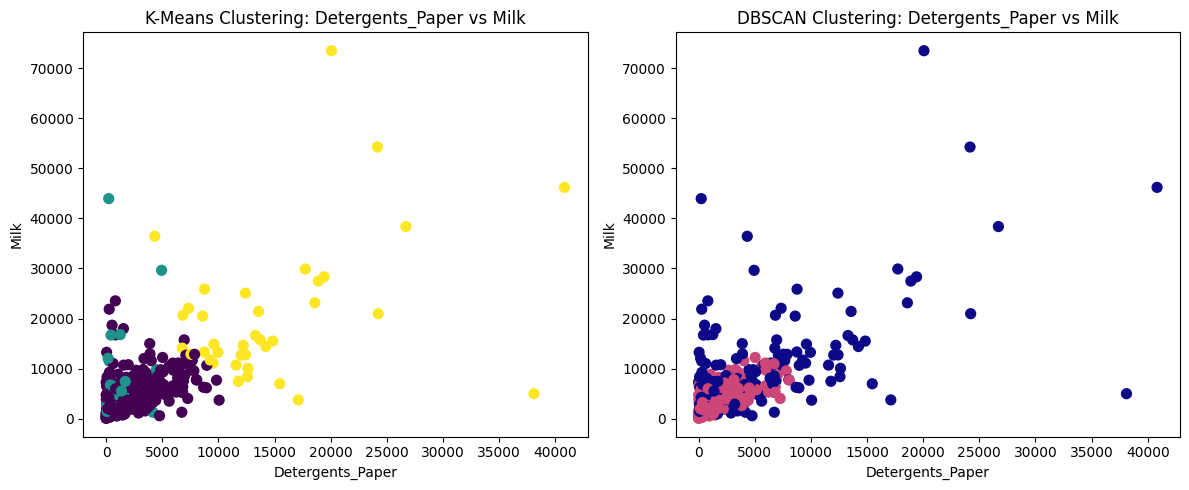

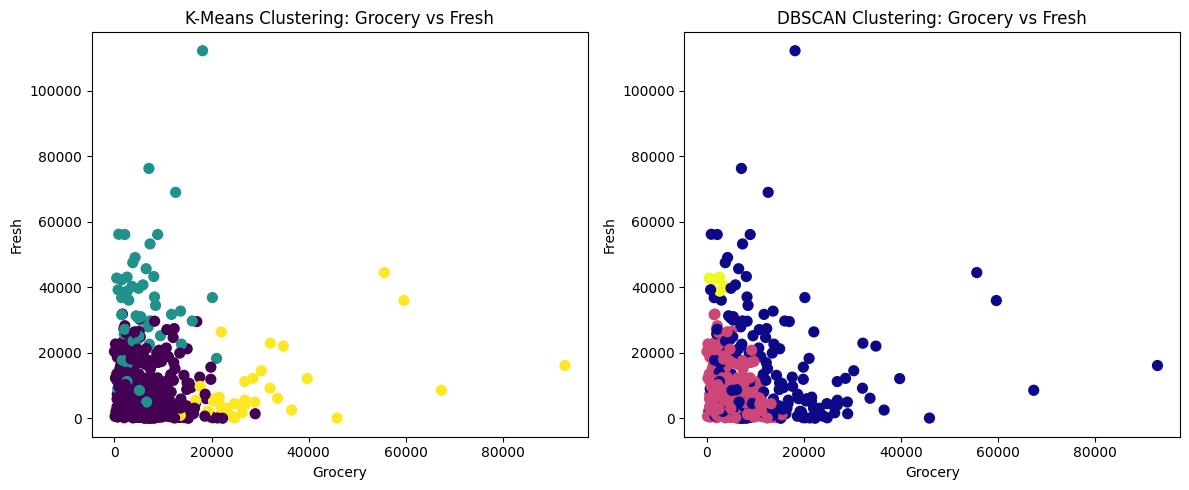

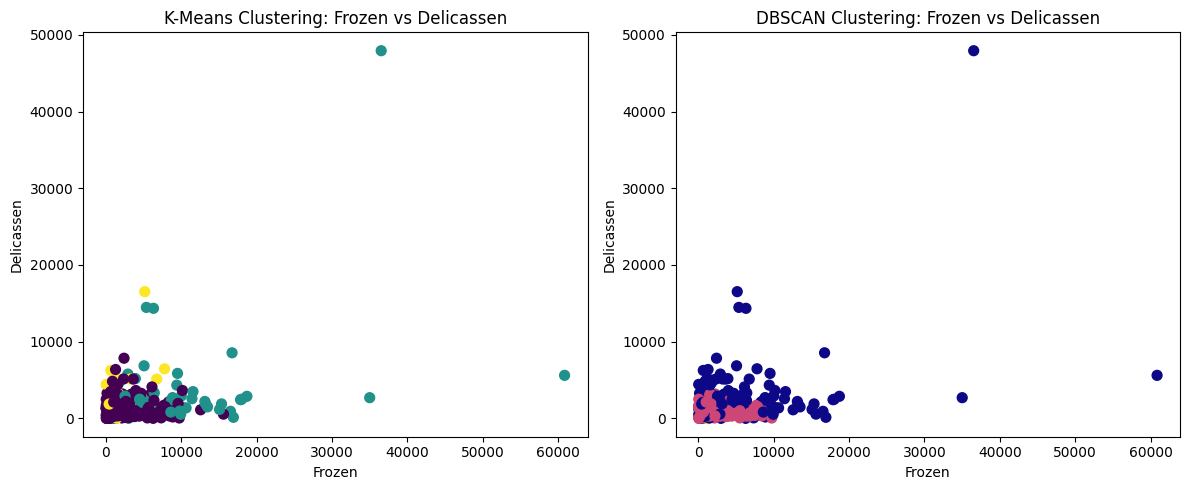

In [14]:
# Your code here:
import matplotlib.pyplot as plt

# Define column pairs
column_pairs = [
    ("Detergents_Paper", "Milk"),
    ("Grocery", "Fresh"),
    ("Frozen", "Delicassen")
]

# Plot side-by-side for each column pair
for x_col, y_col in column_pairs:
    plt.figure(figsize=(12, 5))

    # K-Means
    plt.subplot(1, 2, 1)
    plt.scatter(df[x_col], df[y_col], c=df['labels'], cmap='viridis', s=50)
    plt.title(f"K-Means Clustering: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # DBSCAN
    plt.subplot(1, 2, 2)
    plt.scatter(df[x_col], df[y_col], c=df['labels_DBSCAN'], cmap='plasma', s=50)
    plt.title(f"DBSCAN Clustering: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.tight_layout()
    plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

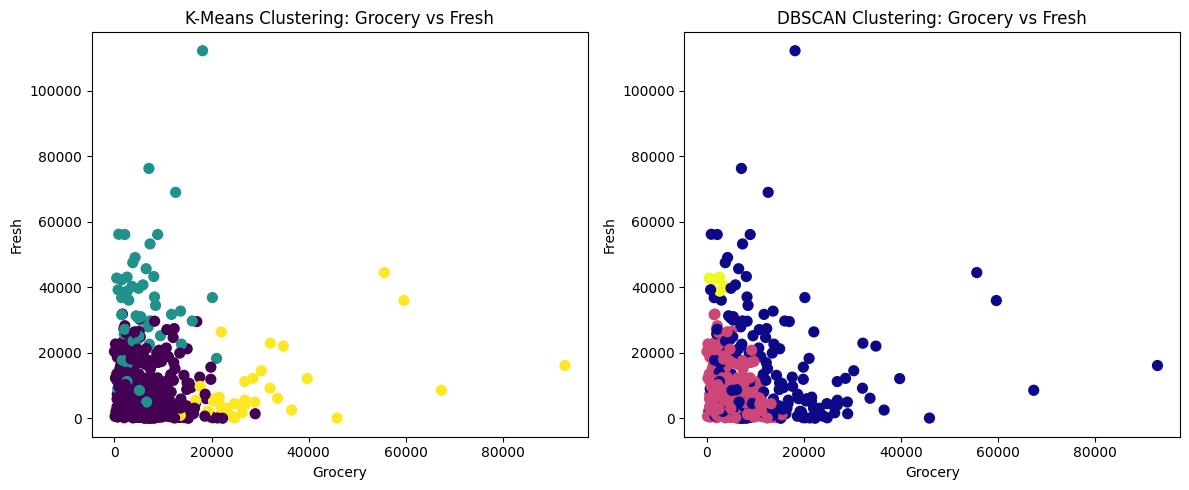

In [15]:
# Your code here:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(df["Grocery"], df["Fresh"], c=df["labels"], cmap="viridis", s=50)
plt.title("K-Means Clustering: Grocery vs Fresh")
plt.xlabel("Grocery")
plt.ylabel("Fresh")

# DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(df["Grocery"], df["Fresh"], c=df["labels_DBSCAN"], cmap="plasma", s=50)
plt.title("DBSCAN Clustering: Grocery vs Fresh")
plt.xlabel("Grocery")
plt.ylabel("Fresh")

plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

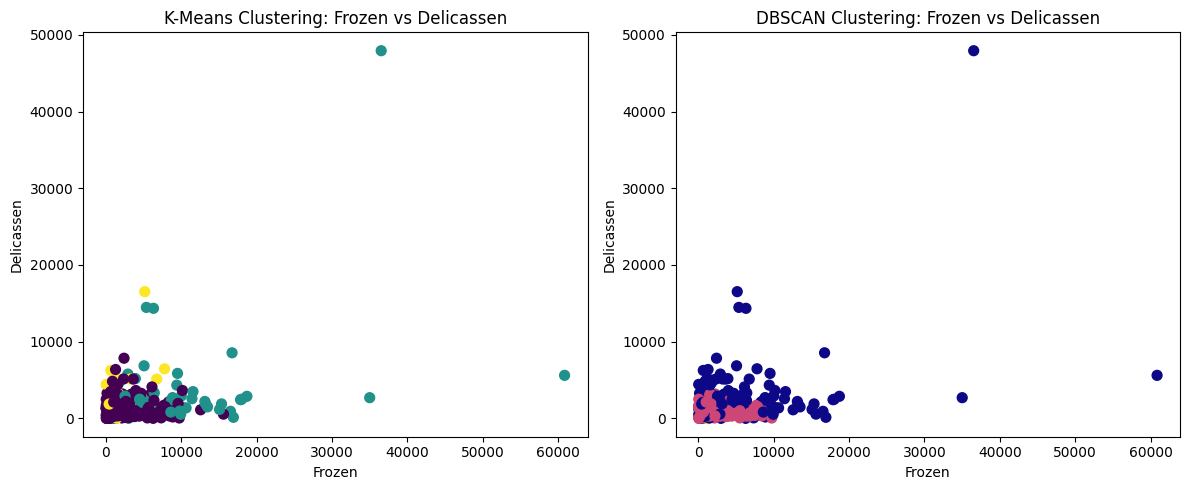

In [16]:
# Your code here:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(df["Frozen"], df["Delicassen"], c=df["labels"], cmap="viridis", s=50)
plt.title("K-Means Clustering: Frozen vs Delicassen")
plt.xlabel("Frozen")
plt.ylabel("Delicassen")

# DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(df["Frozen"], df["Delicassen"], c=df["labels_DBSCAN"], cmap="plasma", s=50)
plt.title("DBSCAN Clustering: Frozen vs Delicassen")
plt.xlabel("Frozen")
plt.ylabel("Delicassen")

plt.tight_layout()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [17]:
# Your code here:
# Group by K-Means labels and compute mean for each cluster
kmeans_means = customers.groupby("labels").mean()
print("K-Means Cluster Means:\n", kmeans_means, "\n")

# Group by DBSCAN labels and compute mean for each cluster
dbscan_means = customers.groupby("labels_DBSCAN").mean()
print("DBSCAN Cluster Means:\n", dbscan_means)


KeyError: 'labels'

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 